In [1]:
# import libraries

import pandas as pd


import numpy as np

import warnings
warnings.filterwarnings ('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
data_ori = pd.read_excel('../Proyecto_Arraigo_Recomender_System/data/Urbanitas.xlsx')


data = data_ori.copy()

In [3]:
data.head()

,<@Propiedades:Código>,<@Propiedades:Descripción>,<@Propiedades:Fecha>,<@Propiedades:Ruta>,<@Datos internos:Responsable>,<@Datos internos:Asignado a>,<@Datos internos:Anteriormente asignado a>,<@Datos internos:Tipo de URB>,<@Datos internos:Formulario reenviado>,<@Datos internos:Consentimiento a la politica de protección de datos de PA>,<@Datos internos:Pago>,<@Datos de Contacto:2. Primer Apellido>,<@Datos de Contacto:3. Segundo Apellido>,<@Datos de Contacto:5. Preferencia de horario de llamada (entre semana)>,<@Datos de Contacto:7. País de residencia>,<@Datos de Contacto:7.1 Especifíque el país si no es España>,<@Datos de Contacto:7. A Provincia de España>,<@Datos de Contacto:7.B Especifique su situación en España>,<@Datos de Contacto:7. B. 1 Detalle su situación>,<@Datos de Contacto:8.1 Ciudad de Residencia>,<@Datos de Contacto:8.2 Lugares dónde ha vivido en los últmos 5 años (especifique los años)>,<@Datos de Contacto:Código Postal>,<@Interesante para:Pueblo grande>,<@Interesante para:Pueblo pequeño>,<@Interesante para:Belorado/Burgos>,<@Interesante para:Palencia>,<@Interesante para:Dueñas>,<@Interesante para:Paredes de nava>,<@Interesante para:Cervera de Pisuerga>,<@Interesante para:Zaragoza>,<@Interesante para:Sierra Norte de Madrid>,<@Interesante para:Jaén>,<@Interesante para:Segovia>,<@Interesante para:Cuenca>,<@Trabajo:17. Profesión>,<@Trabajo:18. Experiencia>,<@Trabajo:20. Situación actual de trabajo>,<@Trabajo:21. Profesión de la pareja>,<@Trabajo:22.2 Situación actual de trabajo (PAREJA)>,<@Trabajo:23. Encontrar trabajo en la zona previamente es indispensable>,<@Trabajo:24. Interesado en alguna licitación>,<@Trabajo:24.1 Bar / restaurante>,<@Trabajo:24.2 Hotel / Casa rural>,<@Trabajo:24.3 Otra>,<@Trabajo:25. Su proyecto de vida en el pueblo es>,<@Trabajo:25.1 Expliquela con más profundidad>,"<@Trabajo:26. Describa brevemente en qué consiste su proyecto, indique el período de tiempo que lleva con él en marcha>",<@Trabajo:27. ¿Tienes ya el proyecto en marcha o bien definido?>,<@Trabajo:28. En caso de búsqueda de trabajo o tener un emprendimmiento que todavía no es viable ¿Cual es su autonomía económica?>,<@Familia:9. Número de personas que conforman el nucleo familiar que se mudaría (apartir del 7/9/22 se avisa que se incluyan ellos mismos)>,<@Familia:10. Edades>,<@Familia:11. Habilidades para compartir en el pueblo>,<@Familia:12. Aficiones de ocio>,<@Familia:13. Coche propio>,<@Familia:14. Carné de conducir coche>,<@Familia:14.1 Carne de conducir de camión/autobus>,<@Familia:15. Mascota>,<@Familia:15.1 Descripción de la mascota>,<@Familia:16. Alguna necesidad específica>,<@Sobre el pueblo:29. Busco vivienda de>,<@Sobre el pueblo:29. 1 Presupuesto de alquiler>,<@Sobre el pueblo:30. La casa es para primera/ segunda vivienda>,<@Sobre el pueblo:31. Interesado en la opción co-living>,<@Sobre el pueblo:31. 1 Si esta interesado en la opción co-living marque cual>,<@Sobre el pueblo:32 Zona donde trabaja el proyecto arraigo que le interesen más>,<@Sobre el pueblo:33. Algun requisito indispensable para la vivienda>,<@Sobre el pueblo:34. Algun requisito indispensable para el pueblo>,<@Interesado en comprar:29. A Presupuesto>,<@Interesado en comprar:29. B Requisitos>,<@Sobre el cambio:35. Estaría dispuesto a moverme a un pueblo>,<@Sobre el cambio:36 ¿Ha tenido experiencias en el mundo rural?>,<@Sobre el cambio:37. Describa su proyecto de vida en un pueblo>,<@Sobre el cambio:38. ¿Por qué quiere irse a vivir a un pueblo?>,<@Sobre el cambio:39. ¿Existe alguna barrera para realizar el cambio?>,<@Sobre el cambio:40. ¿Tienes otros familiares o amigos que también esten interesados?>,<@Sobre el cambio:41. ¿Cómo nos ha conocido?>,<@Sobre el cambio:42. Especifique la pregunta anterior>,<@Sobre el cambio:43. Si hay algo más que quiera añadir para tener en cuenta>,<@Datos Visita:Fecha de la Visita>,<@Datos Visita:Zona Visitada>,<@Datos Visita:Pueblo 1>,<@Datos Visita:Pueblo 2>,<@Datos Visita:Pueblo 3>,<@Datos Visita:Opinion>,<@Datos Visita:E

In [4]:
data.shape


(10618, 95)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10618 entries, 0 to 10617
Data columns (total 95 columns):
 #   Column                                                                                                                                           Non-Null Count  Dtype         
---  ------                                                                                                                                           --------------  -----         
 0   <@Propiedades:Código>                                                                                                                            10617 non-null  object        
 1   <@Propiedades:Descripción>                                                                                                                       2879 non-null   object        
 2   <@Propiedades:Fecha>                                                                                                                             10618 non-null  d

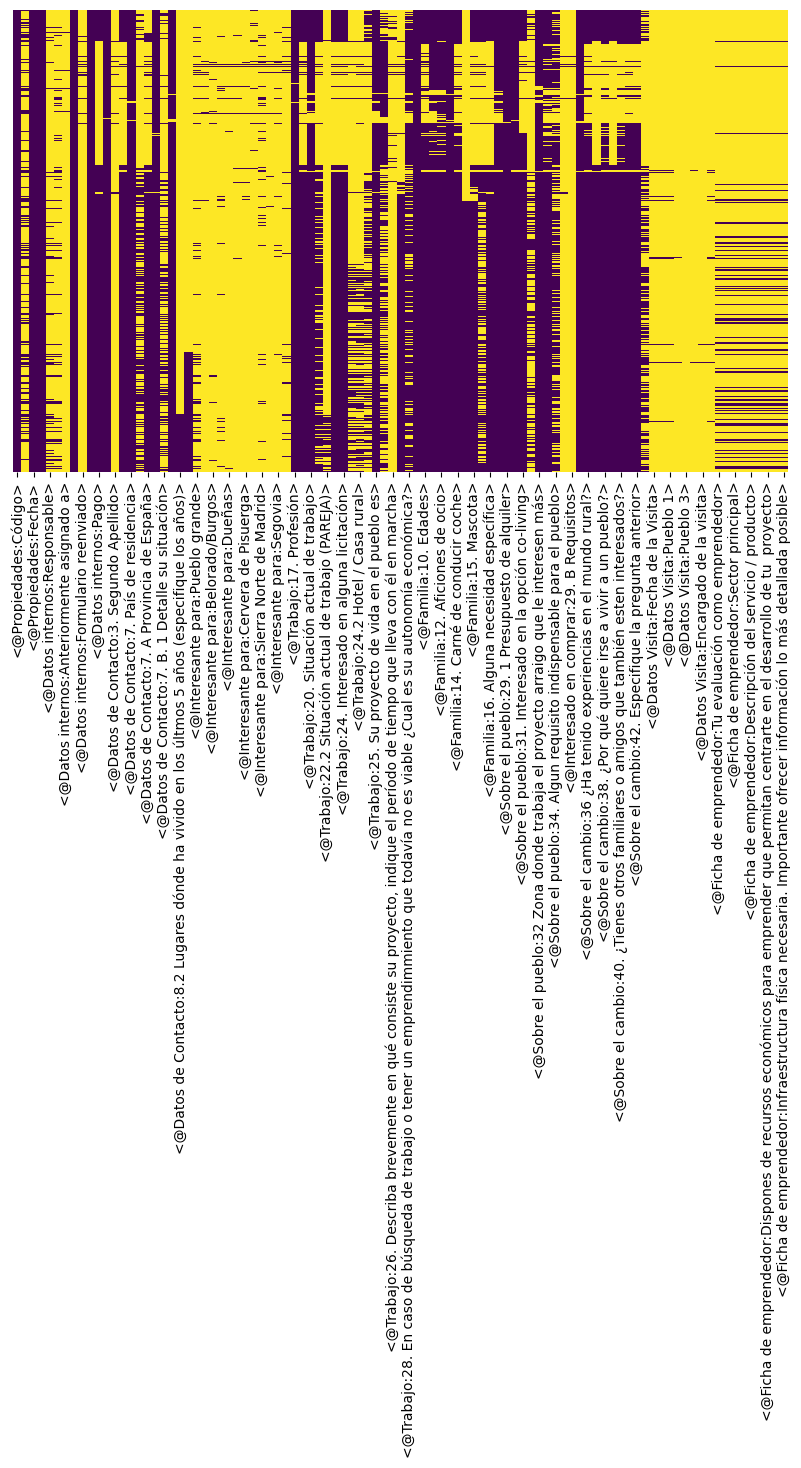

In [6]:
# grafico de nulos en el dataframe

plt.figure(figsize=(10, 6))  

sns.heatmap(data.isna(),   
            yticklabels=False,
            cmap='viridis',
            cbar=False
           )

plt.show();

In [7]:
data.columns = [e.lower(). replace(' ', '_').replace('@', '').replace('>','').replace('<','').replace(':','_') for e in data.columns]

data.head()

,propiedades_código,propiedades_descripción,propiedades_fecha,propiedades_ruta,datos_internos_responsable,datos_internos_asignado_a,datos_internos_anteriormente_asignado_a,datos_internos_tipo_de_urb,datos_internos_formulario_reenviado,datos_internos_consentimiento_a_la_politica_de_protección_de_datos_de_pa,datos_internos_pago,datos_de_contacto_2._primer_apellido,datos_de_contacto_3._segundo_apellido,datos_de_contacto_5._preferencia_de_horario_de_llamada_(entre_semana),datos_de_contacto_7._país_de_residencia,datos_de_contacto_7.1_especifíque_el_país_si_no_es_españa,datos_de_contacto_7._a_provincia_de_españa,datos_de_contacto_7.b_especifique_su_situación_en_españa,datos_de_contacto_7._b._1_detalle_su_situación,datos_de_contacto_8.1_ciudad_de_residencia,datos_de_contacto_8.2_lugares_dónde_ha_vivido_en_los_últmos_5_años_(especifique_los_años),datos_de_contacto_código_postal,interesante_para_pueblo_grande,interesante_para_pueblo_pequeño,interesante_para_belorado/burgos,interesante_para_palencia,interesante_para_dueñas,interesante_para_paredes_de_nava,interesante_para_cervera_de_pisuerga,interesante_para_zaragoza,interesante_para_sierra_norte_de_madrid,interesante_para_jaén,interesante_para_segovia,interesante_para_cuenca,trabajo_17._profesión,trabajo_18._experiencia,trabajo_20._situación_actual_de_trabajo,trabajo_21._profesión_de_la_pareja,trabajo_22.2_situación_actual_de_trabajo_(pareja),trabajo_23._encontrar_trabajo_en_la_zona_previamente_es_indispensable,trabajo_24._interesado_en_alguna_licitación,trabajo_24.1_bar_/_restaurante,trabajo_24.2_hotel_/_casa_rural,trabajo_24.3_otra,trabajo_25._su_proyecto_de_vida_en_el_pueblo_es,trabajo_25.1_expliquela_con_más_profundidad,"trabajo_26._describa_brevemente_en_qué_consiste_su_proyecto,_indique_el_período_de_tiempo_que_lleva_con_él_en_marcha",trabajo_27._¿tienes_ya_el_proyecto_en_marcha_o_bien_definido?,trabajo_28._en_caso_de_búsqueda_de_trabajo_o_tener_un_emprendimmiento_que_todavía_no_es_viable_¿cual_es_su_autonomía_económica?,familia_9._número_de_personas_que_conforman_el_nucleo_familiar_que_se_mudaría_(apartir_del_7/9/22_se_avisa_que_se_incluyan_ellos_mismos),familia_10._edades,familia_11._habilidades_para_compartir_en_el_pueblo,familia_12._aficiones_de_ocio,familia_13._coche_propio,familia_14._carné_de_conducir_coche,familia_14.1_carne_de_conducir_de_camión/autobus,familia_15._mascota,familia_15.1_descripción_de_la_mascota,familia_16._alguna_necesidad_específica,sobre_el_pueblo_29._busco_vivienda_de,sobre_el_pueblo_29._1_presupuesto_de_alquiler,sobre_el_pueblo_30._la_casa_es_para_primera/_segunda_vivienda,sobre_el_pueblo_31._interesado_en_la_opción_co-living,sobre_el_pueblo_31._1_si_esta_interesado_en_la_opción_co-living_marque_cual,sobre_el_pueblo_32_zona_donde_trabaja_el_proyecto_arraigo_que_le_interesen_más,sobre_el_pueblo_33._algun_requisito_indispensable_para_la_vivienda,sobre_el_pueblo_34._algun_requisito_indispensable_para_el_pueblo,interesado_en_comprar_29._a_presupuesto,interesado_en_comprar_29._b_requisitos,sobre_el_cambio_35._estaría_dispuesto_a_moverme_a_un_pueblo,sobre_el_cambio_36_¿ha_tenido_experiencias_en_el_mundo_rural?,sobre_el_cambio_37._describa_su_proyecto_de_vida_en_un_pueblo,sobre_el_cambio_38._¿por_qué_quiere_irse_a_vivir_a_un_pueblo?,sobre_el_cambio_39._¿existe_alguna_barrera_para_realizar_el_cambio?,sobre_el_cambio_40._¿tienes_otros_familiares_o_amigos_que_también_esten_interesados?,sobre_el_cambio_41._¿cómo_nos_ha_conocido?,sobre_el_cambio_42._especifique_la_pregunta_anterior,sobre_el_cambio_43._si_hay_algo_más_que_quiera_añadir_para_tener_en_cuenta,datos_visita_fecha_de_la_visita,datos_visita_zona_visitada,datos_visita_pueblo_1,datos_visita_pueblo_2,datos_visita_pueblo_3,datos_visita_opinion,datos_visita_encargado_de_la_visita,datos_visita_usuario_encargado_de_la_visita,ficha_de_emprendedor_tu_evaluación_como_emprendedor,ficha_de_emprendedor_fase_de_tu_proyecto,ficha_de_emprendedor_sector_principal,ficha_de_emprendedor_descripción_del_negocio,ficha_de_emp

SUBSET CON DATOS PRIORITARIOS DEL CLIENTE

In [8]:
#datos que el cliente ha considerado prioritarios

data_prior = data[['propiedades_código','propiedades_fecha', 'datos_de_contacto_7._país_de_residencia', 'datos_de_contacto_7._a_provincia_de_españa','datos_de_contacto_8.1_ciudad_de_residencia', 'datos_de_contacto_7.b_especifique_su_situación_en_españa', 'trabajo_17._profesión', 'trabajo_28._en_caso_de_búsqueda_de_trabajo_o_tener_un_emprendimmiento_que_todavía_no_es_viable_¿cual_es_su_autonomía_económica?', 'familia_10._edades', 'familia_13._coche_propio', 'familia_14._carné_de_conducir_coche', 'familia_15._mascota', 'sobre_el_pueblo_29._1_presupuesto_de_alquiler', 'sobre_el_pueblo_30._la_casa_es_para_primera/_segunda_vivienda', 'sobre_el_pueblo_32_zona_donde_trabaja_el_proyecto_arraigo_que_le_interesen_más', 'sobre_el_cambio_35._estaría_dispuesto_a_moverme_a_un_pueblo']]
data_prior.shape

(10618, 16)

In [9]:
#renombrar las columnas para facilitar el manejo de los datos

data_prior = data_prior.rename(columns={ 'propiedades_código':'id',
                                        'propiedades_fecha':'fecha',
                                        'datos_de_contacto_7._país_de_residencia':'pais_de_residencia',
                                        'datos_de_contacto_7._a_provincia_de_españa':'provincia_de_espana',
                                        'datos_de_contacto_8.1_ciudad_de_residencia':'ciudad_residencia',
                                        'datos_de_contacto_7.b_especifique_su_situación_en_españa':'situacion_en_espana',
                                        'trabajo_17._profesión':'profesion',
                                        'trabajo_28._en_caso_de_búsqueda_de_trabajo_o_tener_un_emprendimmiento_que_todavía_no_es_viable_¿cual_es_su_autonomía_económica?':'autonomia_economica',
                                        'familia_10._edades':'familia_edades',
                                        'familia_13._coche_propio':'coche_propio',
                                        'familia_14._carné_de_conducir_coche':'carnet_coche',
                                        'familia_15._mascota':'mascota',
                                        'sobre_el_pueblo_29._1_presupuesto_de_alquiler':'presupuesto_alquiler',
                                        'sobre_el_pueblo_30._la_casa_es_para_primera/_segunda_vivienda':'primera_segunda_vivienda',
                                        'sobre_el_pueblo_32_zona_donde_trabaja_el_proyecto_arraigo_que_le_interesen_más': 'zona_interes',
                                        'sobre_el_cambio_35._estaría_dispuesto_a_moverme_a_un_pueblo': 'predisposicion_pueblo'})

                                       

In [10]:
data_prior.head()

,id,fecha,pais_de_residencia,provincia_de_espana,ciudad_residencia,situacion_en_espana,profesion,autonomia_economica,familia_edades,coche_propio,carnet_coche,mascota,presupuesto_alquiler,primera_segunda_vivienda,zona_interes,predisposicion_pueblo
0,NaN,2023-03-01,España,Cantabria,Santander,Tengo nacionalidad española / de un país de la...,Atención al cliente,NaN,30 - 24 - 2,No,Si,No,NaN,NaN,NaN,NaN
1,U-000002,2020-10-26,España,NaN,Algeciras,Tengo nacionalidad española / de un país de la...,Comercio internacional,3 meses,"37,37",Si,Si,No,Hasta 300€,Primera residencia,Pueblos de Zaragoza,3 meses
2,U-000003,2020-10-26,España,NaN,Colmenar Viejo (Madrid),Tengo nacionalidad española / de un país de la...,Dependiente,NaN,"57, 56",Si,Si,Si,Hasta 450€,Segunda residencia,Sierra norte de Madrid,Aún me lo estoy pensando
3,U-000006,2020-11-08,España,NaN,San Fernando de Henares,Tengo nacionalidad española / de un país de la...,Sanitario,NaN,"38, 38 y 8",Si,Si,Si,Hasta 450€,Primera residencia,Sierra norte de Madrid,3 meses
4,U-000007,2020-11-11,España,NaN,Madrid,Tengo nacionalidad española / de un país de la...,Fotógrafo,6 meses,41 y 31 años,Si,Si,Si,Hasta 450€,Primera residencia,Sierra norte de Madrid,6 meses


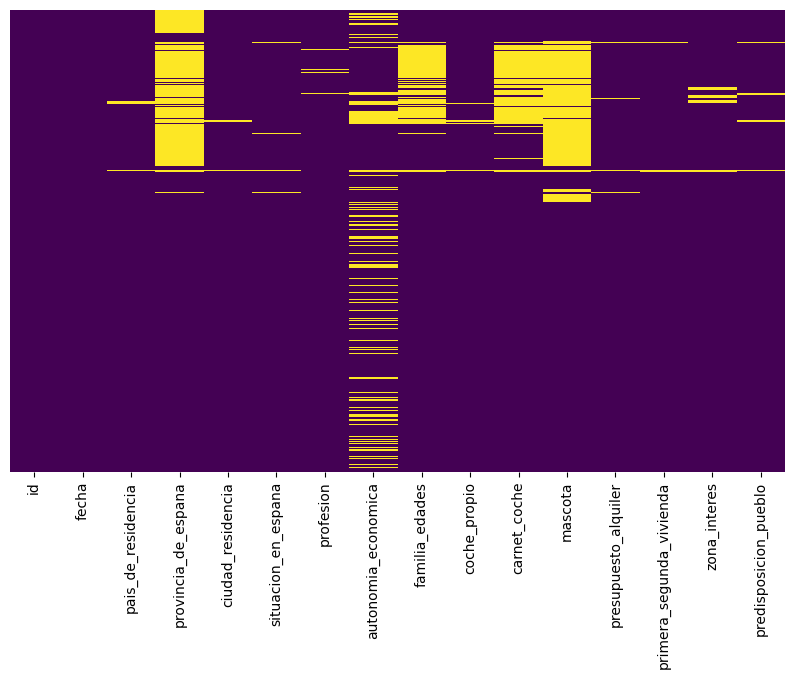

In [11]:
plt.figure(figsize=(10, 6))  

sns.heatmap(data_prior.isna(),   
            yticklabels=False,
            cmap='viridis',
            cbar=False
           )

plt.show();

In [12]:
data_prior.info(), data_prior.shape



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10618 entries, 0 to 10617
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        10617 non-null  object        
 1   fecha                     10618 non-null  datetime64[ns]
 2   pais_de_residencia        10575 non-null  object        
 3   provincia_de_espana       7387 non-null   object        
 4   ciudad_residencia         10590 non-null  object        
 5   situacion_en_espana       10571 non-null  object        
 6   profesion                 10515 non-null  object        
 7   autonomia_economica       8407 non-null   object        
 8   familia_edades            9025 non-null   object        
 9   coche_propio              10544 non-null  object        
 10  carnet_coche              8924 non-null   object        
 11  mascota                   7633 non-null   object        
 12  presupuesto_alquil

(None, (10618, 16))

In [13]:
porcentaje_nulos = data_prior.isnull().sum() / data_prior.count() * 100
porcentaje_nulos.sort_values(ascending=False)

provincia_de_espana         43.739001
mascota                     39.106511
autonomia_economica         26.299512
carnet_coche                18.982519
familia_edades              17.650970
zona_interes                 2.047093
profesion                    0.979553
predisposicion_pueblo        0.787850
coche_propio                 0.701821
primera_segunda_vivienda     0.587344
situacion_en_espana          0.444613
pais_de_residencia           0.406619
presupuesto_alquiler         0.387634
ciudad_residencia            0.264400
id                           0.009419
fecha                        0.000000
dtype: float64

In [14]:
#comparamos provincia con pais de residencia. País contempla 4 valores únicos (España,Resto de Europa (dentro de UE),Latino América y otro) lo cual nos puede dar una pista para completar los nulos de provincia. 

data_prior.query("provincia_de_espana.isnull()")['pais_de_residencia'].head()

1    España
2    España
3    España
4    España
5    España
Name: pais_de_residencia, dtype: object

In [15]:
#como hay 0.4% de nulos en la columna de pais de residencia, comenzaremos por su limpieza para poder luego intentar limpiar la de provincia. 

data_prior.pais_de_residencia.unique()


array(['España', 'Otro', 'Latino América', '???????',
       'Resto de Europa (dentro de UE)', 'Latino America',
       'Resto de Europa (dentro EU)', nan, 'españa',
       'Resto da Europa (dentro da UE)', 'Espanha', 'Autre',
       'América latina', 'Hiszpania', 'Reszta Europy (w UE)', '??????'],
      dtype=object)

In [16]:
data_prior = data_prior.replace({'pais_de_residencia': {'Reszta Europy (w UE)': 'Resto de Europa (dentro de UE)',
                                                        'Resto de Europa (dentro EU)': 'Resto de Europa (dentro de UE)',
                                                        'América latina' : 'Latino América', 'Autre' :'Otro',
                                                        'Latino America' :'Latino América',
                                                        'Hiszpania' :'España',
                                                        'españa' :'España',
                                                        'Resto da Europa (dentro da UE)' :'Resto de Europa (dentro de UE)',
                                                        'Espanha' :'España',
                                                    
                                                       }})
data_prior.pais_de_residencia.unique()

array(['España', 'Otro', 'Latino América', '???????',
       'Resto de Europa (dentro de UE)', nan, '??????'], dtype=object)

In [17]:
data_prior.query("pais_de_residencia == '???????'")['pais_de_residencia'].value_counts()

???????    5
Name: pais_de_residencia, dtype: int64

In [18]:
nan_pais = data_prior['pais_de_residencia'].isna().sum()
nan_pais

43

In [19]:
data_prior.query("pais_de_residencia.isnull()")['ciudad_residencia'].unique()

array(['Albal (Valencia)', 'España', 'Palma de Mallorca España', 'Madrid',
       'Fuenlabrada', 'Bogotá - Colombia', 'Barcelona', 'Tenerife España',
       'Lleida', 'Ramos Mejía (buenos aires )Argentina', 'Argentina',
       'Griñón (Madrid)', 'Italia', 'Cáceres', 'Alicante', 'Lima Peru',
       'Málaga', 'Ojen Malaga', 'Jerez de la Frontera', 'Sineu', 'Siria',
       nan, 'Vilagarcía de Arousa', 'Vilagarcia De Arousa',
       'Ipswich (Inglaterra)'], dtype=object)

In [20]:
len(data_prior.query("provincia_de_espana.isnull()")['ciudad_residencia'].value_counts())

1153

In [21]:
data_prior.query("provincia_de_espana.isnull()")['ciudad_residencia'].unique()

array(['Algeciras', 'Colmenar Viejo (Madrid)', 'San Fernando de Henares',
       ..., 'Mar Del Plata', 'Lanús Buenos Aires', 'Ezpeleta'],
      dtype=object)

In [22]:
#data_prior.to_csv('../Proyecto_Arraigo_Recomender_System/data/Urbanitas_prior.csv', index = False)



LIMPIEZA COLUMNA MASCOTA

In [23]:
data_prior.mascota.unique()

array(['No', 'Si', nan, 'sim', 'Não', '???', 'Non', 'Sim', '??', 'TAk',
       'Tak'], dtype=object)

In [24]:
data_prior = data_prior.replace({'mascota': {'sim': 'Si',
                                             'Não': 'No',
                                             'Non' : 'No',
                                             'TAk' :'Si',
                                             'Tak' :'Si',
                                             'Sim' :'Si',
                                                      }})
data_prior.mascota.unique()

array(['No', 'Si', nan, '???', '??'], dtype=object)

In [25]:
data_prior.fillna({'mascota':'No'}, inplace=True)

In [26]:
data_prior.mascota.unique()

array(['No', 'Si', '???', '??'], dtype=object)

In [27]:
data_prior.head(1)

,id,fecha,pais_de_residencia,provincia_de_espana,ciudad_residencia,situacion_en_espana,profesion,autonomia_economica,familia_edades,coche_propio,carnet_coche,mascota,presupuesto_alquiler,primera_segunda_vivienda,zona_interes,predisposicion_pueblo
0,NaN,2023-03-01,España,Cantabria,Santander,Tengo nacionalidad española / de un país de la...,Atención al cliente,NaN,30 - 24 - 2,No,Si,No,NaN,NaN,NaN,NaN


In [28]:
mascota_si = 'Si'
mascota_no = 'No'

data_prior.loc[data_prior['id'] == 'U-005951', 'mascota'] = mascota_si
data_prior.loc[data_prior['id'] == 'U-011338', 'mascota'] = mascota_si
data_prior.loc[data_prior['id'] == 'U-010051', 'mascota'] = mascota_si
data_prior.loc[data_prior['id'] == 'U-006517', 'mascota'] = mascota_no
data_prior.loc[data_prior['id'] == 'U-007930', 'mascota'] = mascota_no
data_prior.loc[data_prior['id'] == 'U-009524', 'mascota'] = mascota_no


In [29]:
data_prior.mascota.unique()

array(['No', 'Si'], dtype=object)

LIMPIEZA COLUMNA ¡ZONA_INTERES


In [30]:
data_prior.zona_interes.isna().sum()

213

In [31]:
data_prior.zona_interes.unique()

array([nan, 'Pueblos de Zaragoza', 'Sierra norte de Madrid',
       'Indiferente', 'Pueblos de Burgos', 'Pueblos de Soria',
       '? ?????????', 'Pueblos de Jaén', 'Pueblos de Palencia',
       'Pueblos de Galicia', 'Pueblos de Zaragoza-Huesca', 'Sierra Norte',
       'Vacío', 'Pueblos de Huesca y Zaragoza', 'Sierra Norte de Madrid',
       'Pueblos de Segovia', 'Pueblos de Cuenca', 'Soria',
       'Sierra Madrid', 'Burgos', 'Navarra', 'Pueblos de Zamora',
       'Serra ao norte de madrid', '??? ????', 'Indifférent',
       'Indeferente, menos de 150km de Madrid',
       '???????????, ????? 150 ?? ?? ???????', 'Cidades de Zamora',
       'Cidades de Burgos', '?????? ????????',
       'Sierra na pólnoc od Madrytu', 'Cidades de Palência', 'Obojetny',
       '????????????'], dtype=object)

In [32]:
data_prior = data_prior.replace({'zona_interes': {'Serra ao norte de madrid': 'Sierra norte de Madrid',
                                                  'Sierra Madrid': 'Sierra norte de Madrid',
                                                  'Sierra na pólnoc od Madrytu' : 'Sierra norte de Madrid',
                                                  'Sierra Norte de Madrid' :'Sierra norte de Madrid',
                                                  'Sierra Norte' :'Sierra norte de Madrid',
                                                  'Vacío' :'Indiferente',
                                                  'Indifférent' :'Indiferente',
                                                  'Obojetny' :'Indiferente',
                                                  'Indeferente, menos de 150km de Madrid' :'Indiferente, menos de 150km de Madrid',
                                                  'Cidades de Palência' :'Pueblos de Palencia',
                                                  'Cidades de Zamora' :'Pueblos de Zamora',
                                                  'Cidades de Burgos' :'Pueblos de Burgos',
                                                  '???????????, ????? 150 ?? ?? ???????' :'Indiferente, menos de 150km de Madrid',
                                                  'Burgos' :'Pueblos de Burgos',
                                                  'Soria' :'Pueblos de Soria',
                                                  'Pueblos de Huesca y Zaragoza' :'Pueblos de Zaragoza-Huesca',
                                                  '????????????' :'Indiferente',
                                                  
                                                  
                                                  
                                                  
                                                  
                                                  
                                                
                                                      }})
data_prior.zona_interes.unique()

array([nan, 'Pueblos de Zaragoza', 'Sierra norte de Madrid',
       'Indiferente', 'Pueblos de Burgos', 'Pueblos de Soria',
       '? ?????????', 'Pueblos de Jaén', 'Pueblos de Palencia',
       'Pueblos de Galicia', 'Pueblos de Zaragoza-Huesca',
       'Pueblos de Segovia', 'Pueblos de Cuenca', 'Navarra',
       'Pueblos de Zamora', '??? ????',
       'Indiferente, menos de 150km de Madrid', '?????? ????????'],
      dtype=object)

In [33]:
data_prior.fillna({'zona_interes':'Indiferente'}, inplace=True)

In [34]:
data_prior.autonomia_economica.unique()

array([nan, '3 meses', '6 meses', '1 año', 'Más de 1 año', '6 ???????',
       'Hasta 12 meses', 'Hasta 3 meses', 'Hasta 6 meses',
       'Más de 12 meses',
       'No dispongo de autonomía económica en estos momentos',
       'Dispongo de capacidad económica regular (jubilado, trabajo a distancia, trabajo fijo...)',
       'Más de 6 meses', '1 ano', '???? ?? ???', '3 ??????', '3 mois'],
      dtype=object)

In [35]:
#pip install geopy
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="my-app")
location = geolocator.geocode("Valdeobispo")

print(location.address) 

Valdeobispo, Vegas del Alagón, Cáceres, Extremadura, 10672, España


In [52]:
def get_country_and_province(city):
    
    geolocator = Nominatim(user_agent="geoapiExercises")
    location = geolocator.geocode(city, timeout=30)
    if location:
        country = location.address.split(',')[-1].strip()
        province = 'NINGUNA'
        if country == 'España':
            try:
                province = location.address.split(',')[-2].strip()
            except:
                pass
        return country, province
    else:
        pass






In [53]:
def fill_country_and_province(data_prior, ciudad_residencia, pais_de_residencia, provincia_de_espana):
    mask = data_prior[provincia_de_espana].isnull() | data_prior[pais_de_residencia].isnull()
    data_prior.loc[mask, [pais_de_residencia, provincia_de_espana]] = data_prior[mask][ciudad_residencia].apply(get_country_and_province)


In [54]:
fill_country_and_province(data_prior, 'ciudad_residencia', 'pais_de_residencia', 'provincia_de_espana')


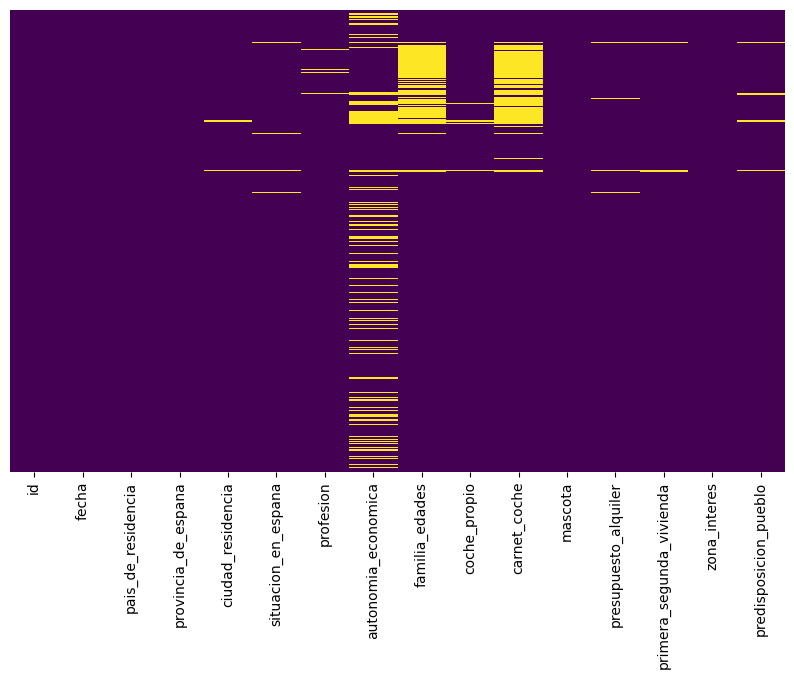

In [55]:
plt.figure(figsize=(10, 6))  

sns.heatmap(data_prior.isna(),   
            yticklabels=False,
            cmap='viridis',
            cbar=False
           )

plt.show();

In [56]:
data_prior.to_csv('../Proyecto_Arraigo_Recomender_System/data/Urbanitas_prior2.csv')

In [57]:
data_prior2_ori = pd.read_csv('../Proyecto_Arraigo_Recomender_System/data/Urbanitas_prior2.csv')


data_prior2 = data_prior2_ori.copy()

In [58]:
data_prior2.head()

,Unnamed: 0,id,fecha,pais_de_residencia,provincia_de_espana,ciudad_residencia,situacion_en_espana,profesion,autonomia_economica,familia_edades,coche_propio,carnet_coche,mascota,presupuesto_alquiler,primera_segunda_vivienda,zona_interes,predisposicion_pueblo
0,0,NaN,2023-03-01,España,Cantabria,Santander,Tengo nacionalidad española / de un país de la...,Atención al cliente,NaN,30 - 24 - 2,No,Si,No,NaN,NaN,Indiferente,NaN
1,1,U-000002,2020-10-26,"('España', 'Andalucía')","('España', 'Andalucía')",Algeciras,Tengo nacionalidad española / de un país de la...,Comercio internacional,3 meses,"37,37",Si,Si,No,Hasta 300€,Primera residencia,Pueblos de Zaragoza,3 meses
2,2,U-000003,2020-10-26,"('España', 'Comunidad de Madrid')","('España', 'Comunidad de Madrid')",Colmenar Viejo (Madrid),Tengo nacionalidad española / de un país de la...,Dependiente,NaN,"57, 56",Si,Si,Si,Hasta 450€,Segunda residencia,Sierra norte de Madrid,Aún me lo estoy pensando
3,3,U-000006,2020-11-08,"('España', '28830')","('España', '28830')",San Fernando de Henares,Tengo nacionalidad española / de un país de la...,Sanitario,NaN,"38, 38 y 8",Si,Si,Si,Hasta 450€,Primera residencia,Sierra norte de Madrid,3 meses
4,4,U-000007,2020-11-11,"('España', 'Comunidad de Madrid')","('España', 'Comunidad de Madrid')",Madrid,Tengo nacionalidad española / de un país de la...,Fotógrafo,6 meses,41 y 31 años,Si,Si,Si,Hasta 450€,Primera residencia,Sierra norte de Madrid,6 meses


In [60]:
data_prior2.provincia_de_espana.unique()

array(['Cantabria', "('España', 'Andalucía')",
       "('España', 'Comunidad de Madrid')", "('España', '28830')",
       "('España', '46133')", "('Cuba', 'NINGUNA')", 'Madrid',
       "('España', 'Illes Balears')", "('United States', 'NINGUNA')",
       "('Россия', 'NINGUNA')", "('España', '31500')",
       "('España', 'Comunitat Valenciana')", "('España', '36960')",
       "('España', '08001')", "('España', '45210')",
       "('México', 'NINGUNA')", "('España', '03830')",
       "('España', 'Canarias')", "('España', '08500')",
       "('España', 'Aragón')", "('España', '08330')",
       "('Argentina', 'NINGUNA')", "('España', 'Extremadura')",
       "('España', 'Euskadi')", "('España', '28970')",
       "('España', 'Catalunya')", "('España', 'Castilla y León')",
       "('España', '08410')", "('Bolivia', 'NINGUNA')",
       "('Venezuela', 'NINGUNA')", "('España', 'Galicia')",
       "('España', '28411')", "('España', '08232')",
       "('España', '48620')", "('España', '41710')",
    